In [1]:
# This notebook applies the different denoising techniques to one image
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import gaussian
from scipy.ndimage import median_filter
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as ssim

from filters_hw2 import *
from wnnm_final import *

In [2]:
# Load the clean image and add noise
clean = io.imread('test_images_greyscale/12.gif').astype(float)/255
sigma_noise = 0.1
noisy = np.clip(clean + np.random.normal(loc=0.0, scale=sigma_noise, size=clean.shape),0,1)

# Initialize dictionaries for outputs
ssims = {}
filtered = {}
psnrs = {}

# Compute noisy psnr and ssim
psnrs['noisy'] = compute_psnr(clean,noisy)
ssims['noisy'] = ssim(clean,noisy)

In [3]:
# Apply gaussian filtering
sigma = 0.9
filtered['gaussian'] = gaussian(noisy,sigma)
psnrs['gaussian'] = compute_psnr(clean,filtered['gaussian'])
ssims['gaussian'] = ssim(clean,filtered['gaussian'])

In [4]:
# Apply bilateral filtering
filtSize = 3
sigmaIntensity = 0.4
filtered['bilateral'] = bilateral2d(noisy,
                        radius=filtSize,
                        sigma=sigma,
                        sigmaIntensity=sigmaIntensity)

psnrs['bilateral'] = compute_psnr(clean,filtered['bilateral'])
ssims['bilateral'] = ssim(clean,filtered['bilateral'])

In [5]:
# Apply nlm filtering
nlmSigma = 0.1
averageFilterRadius = 3
searchWindowRadius = 9
    
filtered['nlm'] = nonlocalmeans(noisy.reshape((noisy.shape[0],noisy.shape[1],1)),searchWindowRadius,
                    averageFilterRadius,
                    sigma,
                    nlmSigma).reshape((noisy.shape[0],noisy.shape[1]))
psnrs['nlm'] = compute_psnr(clean,filtered['nlm'])
ssims['nlm'] = ssim(clean,filtered['nlm'])

In [6]:
# Apply WNNM filtering
patchRadius = 3
delta = 0.1
c = 0.005
K = 3
sigma_n = 0.1
N_threshold = 50

filtered['wnnm'] = wnnm(noisy.reshape((noisy.shape[0],noisy.shape[1],1)),patchRadius, delta, c, K, sigma_n,N_threshold).reshape((noisy.shape[0],noisy.shape[1]))
psnrs['wnnm'] = compute_psnr(clean,filtered['wnnm'])
ssims['wnnm'] = ssim(clean,filtered['wnnm'])

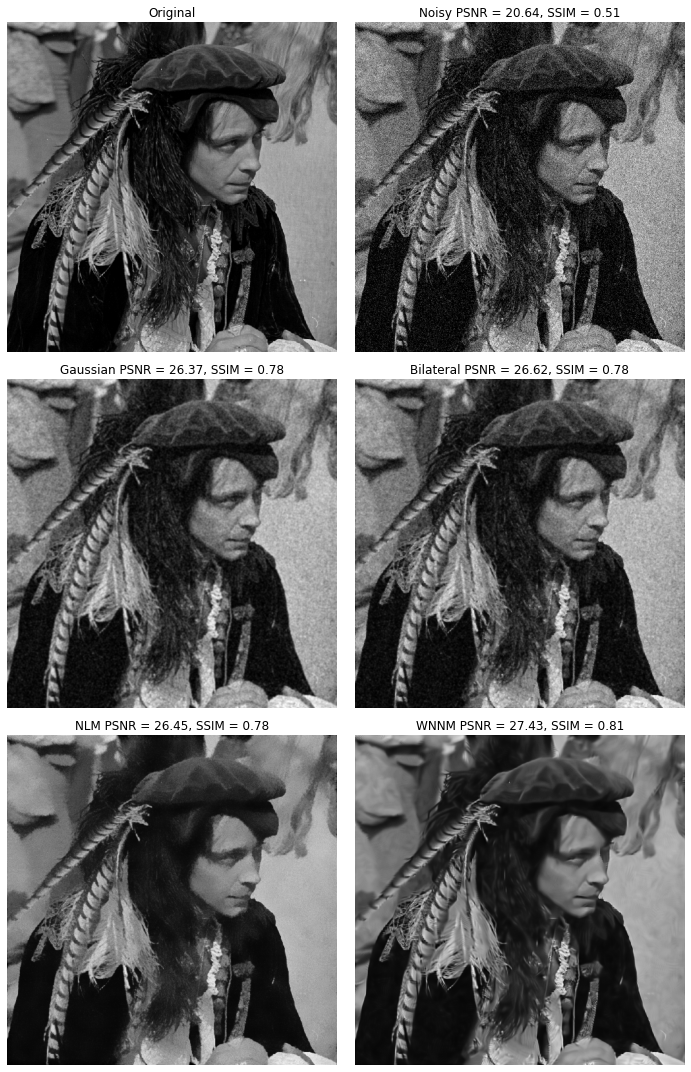

In [7]:
# Print and save the denoised images
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

ax[0,0].imshow(clean,cmap='gray')
ax[0,0].set_title('Original')
ax[0,0].axis('off')
io.imsave('results_greyscale/one_image/clean.png',(clean*255).astype(np.uint8))

ax[0,1].imshow(noisy,cmap='gray')
ax[0,1].set_title(f"Noisy PSNR = {psnrs['noisy']:.2f}, SSIM = {ssims['noisy']:.2f}")
ax[0,1].axis('off')
io.imsave('results_greyscale/one_image/noisy.png',(noisy*255).astype(np.uint8))

ax[1,0].imshow(filtered['gaussian'],cmap='gray')
ax[1,0].set_title(f"Gaussian PSNR = {psnrs['gaussian']:.2f}, SSIM = {ssims['gaussian']:.2f}")
ax[1,0].axis('off')
io.imsave('results_greyscale/one_image/gaussian.png',(filtered['gaussian']*255).astype(np.uint8))

ax[1,1].imshow(filtered['bilateral'],cmap='gray')
ax[1,1].set_title(f"Bilateral PSNR = {psnrs['bilateral']:.2f}, SSIM = {ssims['bilateral']:.2f}")
ax[1,1].axis('off')
io.imsave('results_greyscale/one_image/bilateral.png',(filtered['bilateral']*255).astype(np.uint8))

ax[2,0].imshow(filtered['nlm'],cmap='gray')
ax[2,0].set_title(f"NLM PSNR = {psnrs['nlm']:.2f}, SSIM = {ssims['nlm']:.2f}")
ax[2,0].axis('off')
io.imsave('results_greyscale/one_image/nlm.png',(filtered['nlm']*255).astype(np.uint8))

ax[2,1].imshow(filtered['wnnm'],cmap='gray')
ax[2,1].set_title(f"WNNM PSNR = {psnrs['wnnm']:.2f}, SSIM = {ssims['wnnm']:.2f}")
ax[2,1].axis('off')
io.imsave('results_greyscale/one_image/wnnm.png',(filtered['wnnm']*255).astype(np.uint8))

plt.tight_layout()
plt.show()